In [1]:
!git clone https://github.com/cath-iv/2024-Kozhevnikova-TimeSeriesCourse.git

Cloning into '2024-Kozhevnikova-TimeSeriesCourse'...
remote: Enumerating objects: 664, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 664 (delta 124), reused 78 (delta 78), pack-reused 501 (from 1)
Receiving objects: 100% (664/664), 278.88 MiB | 12.95 MiB/s, done.
Resolving deltas: 100% (267/267), done.
Updating files: 100% (199/199), done.


# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 6. Поиск эволюционирующих шаблонов с помощью матричного профиля ряда.**

In [2]:
%load_ext autoreload
%autoreload 2

## **Часть 1.** Поиск цепочек временного ряда.

Импорт библиотек и модулей

In [4]:
!pip install stumpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 4.5 MB/s eta 0:00:00


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stumpy
from sklearn.metrics import mean_squared_error

В первом задании вам предстоит выполнить поиск эволюционирующих шаблонов временного ряда. Выполните считывание набора данных [Rotation Matrix](datasets/Rotation%20Matrix.txt), найдите в нем самую длинную цепочку и выведите индексы начала звеньев этой цепочки.

In [ ]:
#https://stumpy.readthedocs.io/en/latest/Tutorial_Time_Series_Chains.html#visualizing-the-unanchored-chain

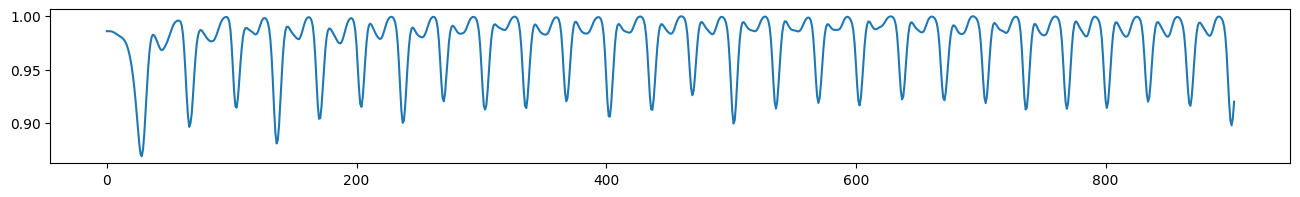

In [7]:
fig, ax = plt.subplots(figsize=(16, 2))
ts = np.loadtxt('/content/2024-Kozhevnikova-TimeSeriesCourse/practice/06 Chains/datasets/Rotation Matrix.txt')
ax.plot(ts)

In [12]:
window_size = 20
mp = stumpy.stump(ts, m=window_size) # рассчитаем индексы матричного профиля и установим размер окна
all_chain_set, unanchored_chain = stumpy.allc(mp[:, 2], mp[:, 3]) #allc, которая не только возвращает набор всех цепочек, но и, в качестве бонуса,
                                                                  # возвращает самую длинную цепочку, также известную как неякорная цепочка
unanchored_chain

array([ 74, 143, 177, 475, 807, 840])

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

## **Часть 2. Визуализация цепочек**

Выполните визуализацию найденных в прошлом задании цепочек: постройте график временного ряда, на котором выделены звенья цепочек. Также постройте график, на котором изображены только сами звенья.

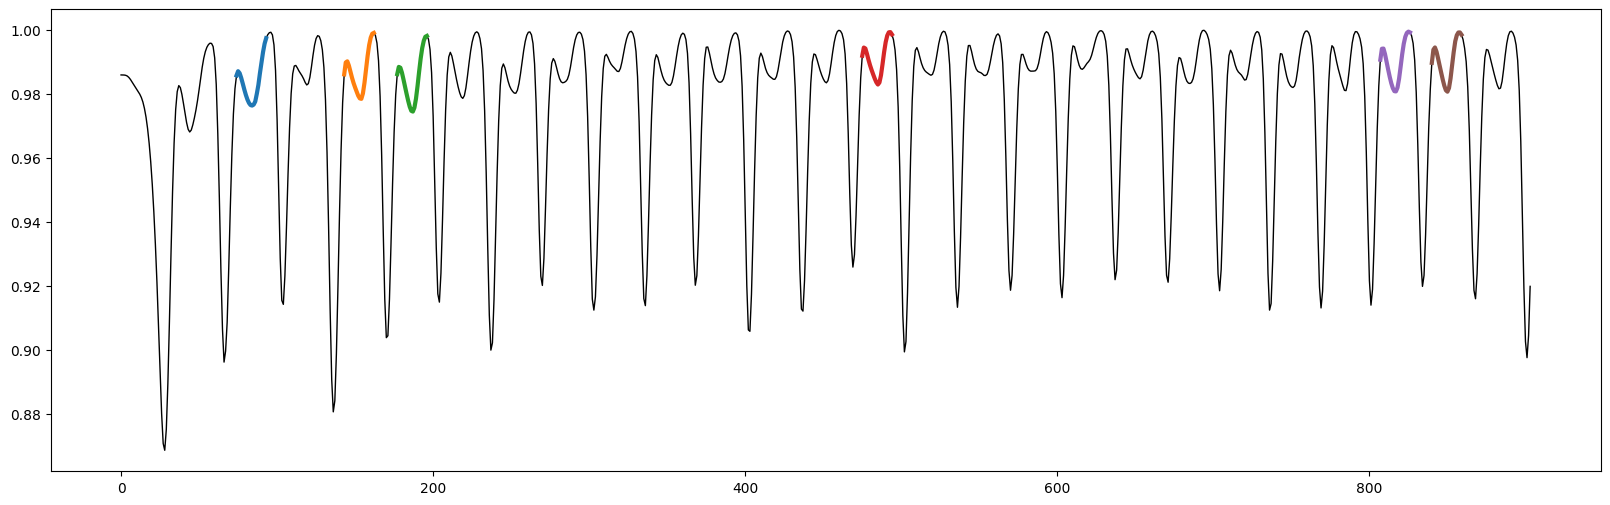

In [18]:
%matplotlib inline

from scipy.io import loadmat
import itertools

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

plt.plot(ts, linewidth=1, color='black')
for i in range(unanchored_chain.shape[0]):
    y = ts[unanchored_chain[i]:unanchored_chain[i]+m]
    x = range(unanchored_chain[i],unanchored_chain[i]+window_size)
    plt.plot(x, y, linewidth=3)
color = itertools.cycle(['white', 'gainsboro'])
plt.show()

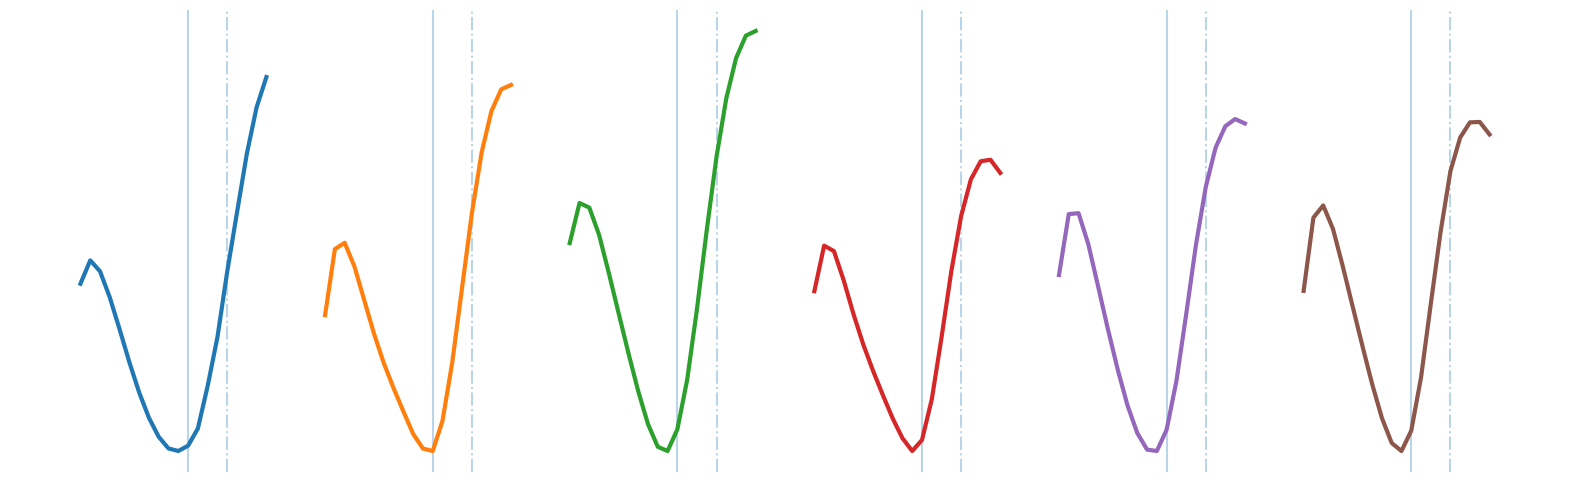

In [21]:
plt.axis('off')
for i in range(unanchored_chain.shape[0]):
    x = np.array(range(unanchored_chain[i],unanchored_chain[i]+window_size))
    y = ts[unanchored_chain[i]:unanchored_chain[i]+window_size]
    plt.axvline(x=x[0]-x.min()+(m+5)*i + 11, alpha=0.3)
    plt.axvline(x=x[0]-x.min()+(m+5)*i + 15, alpha=0.3, linestyle='-.')
    plt.plot(x-x.min()+(m+5)*i, y-y.min(), linewidth=3)
plt.show()

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

## **Часть 3.** Предсказывание значений ряда на основе цепочек.

Предскажите значения последнего звена цепочки, вычислив разность между двумя предыдущими звеньями цепочки. Сравните полученное предсказание с истинным значением.

MSE: 7.011907217030383e-06


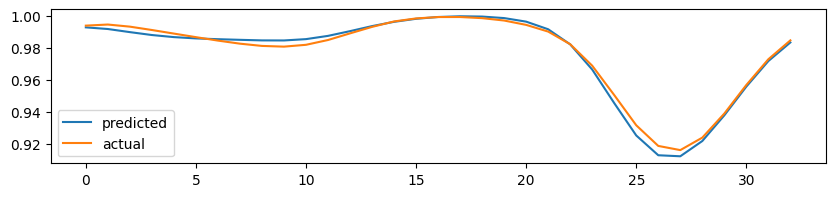

In [11]:
true_val = ts[unanchored_chain[-1]:unanchored_chain[-1]+window_size]
diff = ts[unanchored_chain[-3]:unanchored_chain[-3]+window_size] - ts[unanchored_chain[-2]:unanchored_chain[-2]+window_size]
pred_val = ts[unanchored_chain[-2]:unanchored_chain[-2]+window_size] + diff
fig, ax = plt.subplots(figsize=(10, 2))
ax.plot(pred_val, label='predicted')
ax.plot(true_val, label='actual')
ax.legend(loc='lower left')
print(f'MSE: {mean_squared_error(true_val, pred_val)}')

window_size = 4, MSE: 1.4851072826250094e-06
-----------------
window_size = 8, MSE: 1.1796177877625282e-06
-----------------
window_size = 12, MSE: 2.3904196435916985e-06
-----------------
window_size = 16, MSE: 1.8677092814625313e-06
-----------------
window_size = 20, MSE: 1.4958163708600256e-06
-----------------
window_size = 24, MSE: 3.160670821483367e-06
-----------------
window_size = 28, MSE: 4.7209447976160875e-05
-----------------
window_size = 32, MSE: 4.8550373215753184e-05
-----------------
window_size = 36, MSE: 4.445606369214171e-05
-----------------
window_size = 40, MSE: 4.004403430363253e-05
-----------------
window_size = 44, MSE: 3.7371048863984106e-05
-----------------
window_size = 48, MSE: 3.479328396987084e-05
-----------------
window_size = 52, MSE: 3.2457143211415394e-05
-----------------
window_size = 56, MSE: 3.0715164524894644e-05
-----------------
window_size = 60, MSE: 4.1908825231568375e-05
-----------------


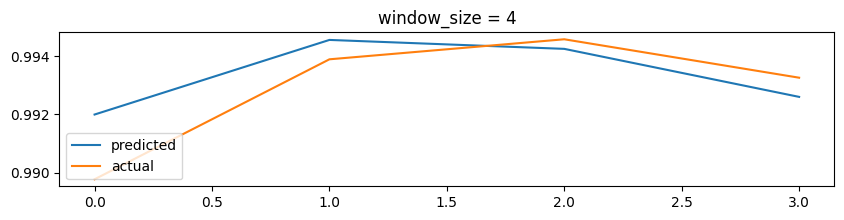

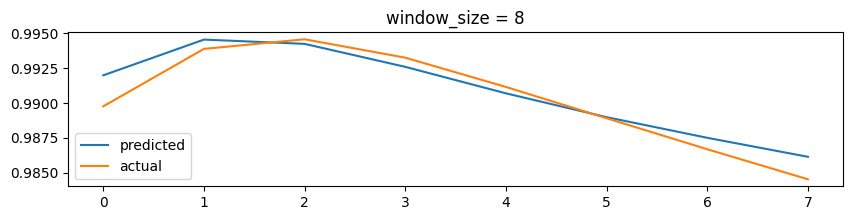

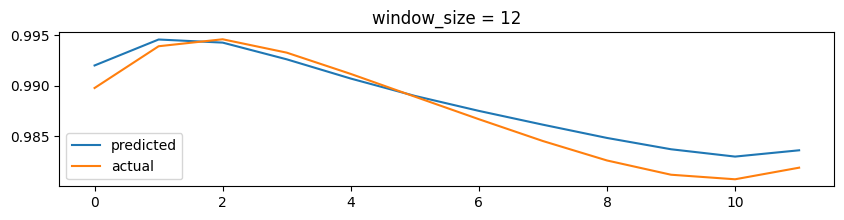

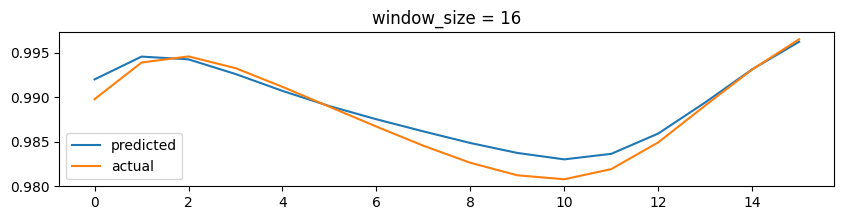

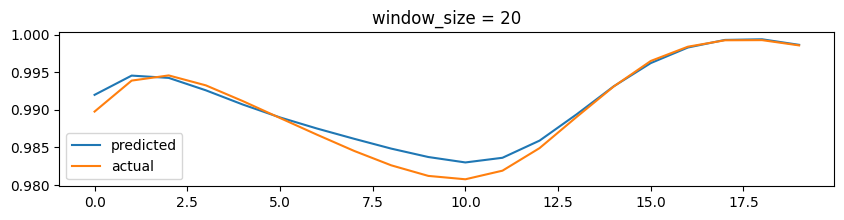

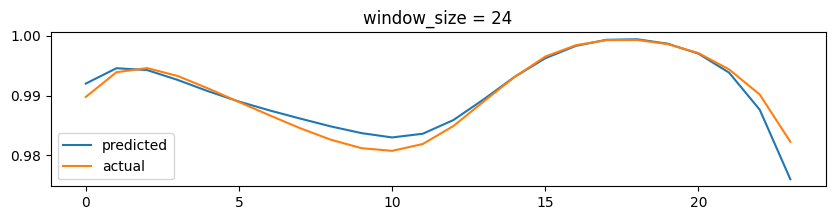

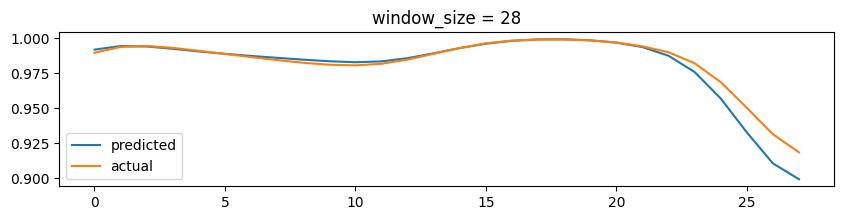

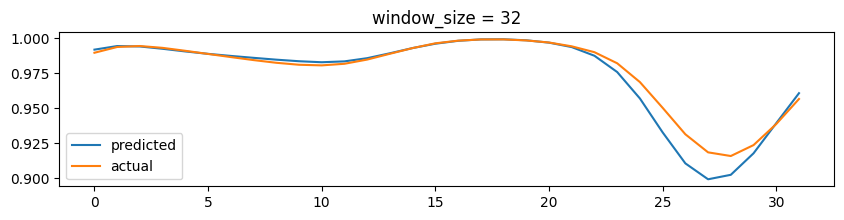

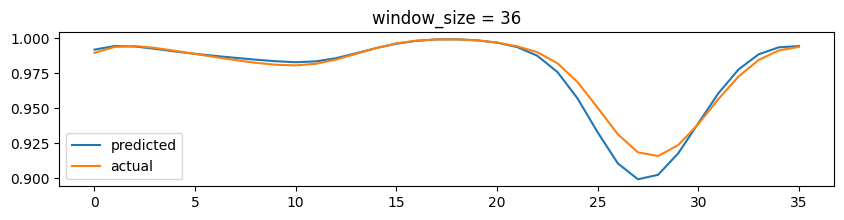

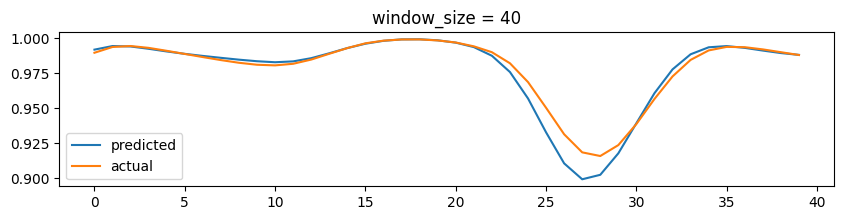

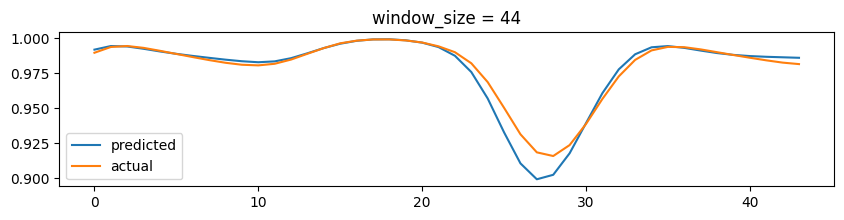

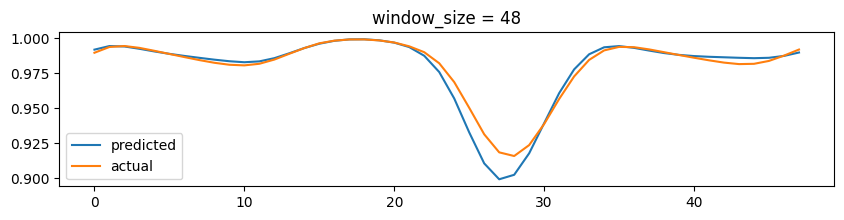

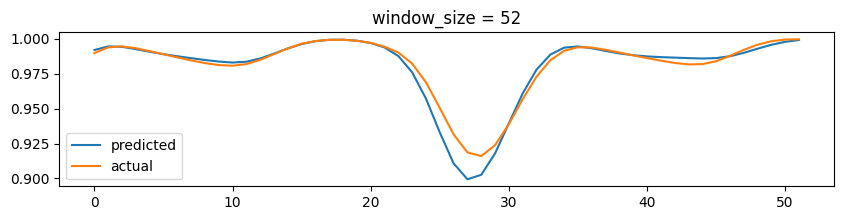

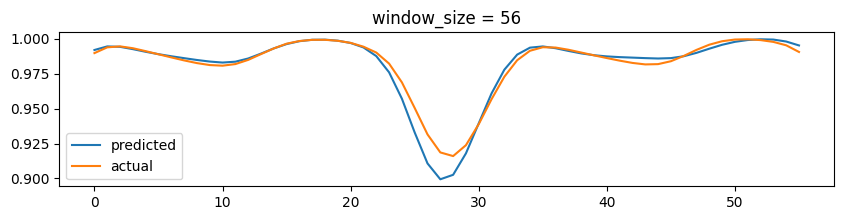

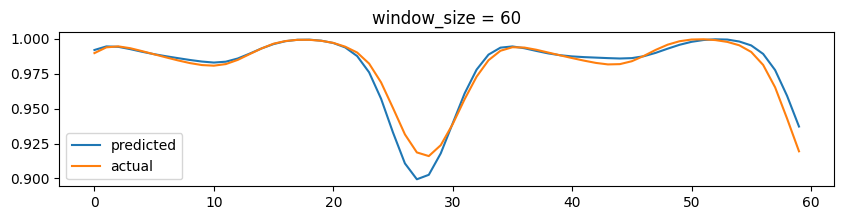

In [26]:
for m in range(4, 64, 4):
    window_size = m
    true_val = ts[unanchored_chain[-1]:unanchored_chain[-1]+window_size]
    diff = ts[unanchored_chain[-3]:unanchored_chain[-3]+window_size] - ts[unanchored_chain[-2]:unanchored_chain[-2]+window_size]
    pred_val = ts[unanchored_chain[-2]:unanchored_chain[-2]+window_size] + diff
    fig, ax = plt.subplots(figsize=(10, 2))
    plt.title(f'window_size = {m}')
    ax.plot(pred_val, label='predicted')
    ax.plot(true_val, label='actual')
    ax.legend(loc='lower left')
    print(f'window_size = {m}, MSE: {mean_squared_error(true_val, pred_val)}')
    print('-----------------')

❓ Проанализируйте и изложите содержательный смысл полученных результатов.